### Import Dependencies

In [11]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)


### Import Data + Concatenate

In [21]:
data_2010_2020 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=179693&section=ef")
data_1999_2009 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=179695&section=ef")
data_1988_1998 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=179696&section=ef")
data_1977_1987 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=179703&section=ef")
data_1976_1970 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=179706&section=ef")
data_list = [data_2010_2020, data_1999_2009, data_1988_1998, data_1977_1987, data_1976_1970]

In [22]:
[df.shape for df in data_list]

[(44609, 9), (45888, 9), (43869, 9), (25699, 9), (16264, 9)]

In [23]:
df = pd.concat(data_list)
# df.to_csv('naei_air_pollutant_factors.csv')

### EDA

In [24]:
# df['Year'] = pd.to_datetime(df['Year'], format="%Y")

In [92]:
df.shape

(176329, 9)

In [89]:
df.drop_duplicates(subset='Source').head(20)

,Pollutant,Sector,NFR Code,Source,Fuel Name,Year,Emission Factor,Units,Activity Units
0,Black Smoke,Energy,Agriculture/Forestry/Fishing: Stationary,Agriculture - stationary combustion,Coal,2010,3.759398e-05,kilotonne,TJ (net)
61,Black Smoke,Energy,International aviation LTO (civil),Aircraft - international take off and landing,Aviation spirit,2010,3.083581e-06,kilotonne,TJ (net)
76,Black Smoke,Energy,National navigation (shipping),Shipping - coastal,Fuel oil,2010,3.315259e-05,kilotonne,TJ (net)
111,Carbon Monoxide,Energy,Manufacture of solid fuels and other energy in...,Coke production,Blast furnace gas,2010,2.900000e-05,kilotonne,TJ (net)
146,Black Smoke,Energy,Manufacture of solid fuels and other energy in...,Collieries - combustion,Coal,2010,3.590664e-05,kilotonne,TJ (net)
191,Non Methane VOC,Energy,Fugitive emission from solid fuels: Coal minin...,Deep-mined coal,Coal produced,2010,3.000000e+00,kilotonne,Mt material produced
192,Black Smoke,Energy,Residential: Stationary,Domestic combustion,Anthracite,2010,1.700577e-04,kilotonne,TJ (net)
444,Black Smoke,Energy,Agriculture/Forestry/Fishing: National fishing,Fishing vessels,Fuel oil,2010,3.315259e-05,kilotonne,TJ (net)
479,Non Methane VOC,Energy,Fugitive emissions from natural gas (explorati...,Gas leakage,Natural Gas (leakage at point of use),2010,3.091607e-07,kilotonne,TJ (net)
485,Carbon Monoxide,Energy,Manufacture of solid fuels and other energy in...,Gas production,Natural gas,2010,2.900000e-05,kilotonne,TJ (net)


In [96]:
df.groupby('Year')['Pollutant'].count().tail(20)

Year
2001    4315
2002    4185
2003    4138
2004    4123
2005    4114
2006    4142
2007    4108
2008    4122
2009    4081
2010    4108
2011    4112
2012    4108
2013    4054
2014    4058
2015    4040
2016    4028
2017    4036
2018    4030
2019    4046
2020    3989
Name: Pollutant, dtype: int64

In [100]:
df[df['Year'] > 2000].pivot_table(index='Pollutant',columns='Year', aggfunc='count')

Activity Units                      \
Year                                             2001 2002 2003 2004 2005   
Pollutant                                                                   
13-butadiene                                       84   84   84   84   85   
Acenaphthene                                       83   77   76   76   76   
Acenaphthylene                                     85   79   78   78   78   
Ammonia                                           266  268  267  268  280   
Anthracene                                        100   94   93   93   93   
Benz[a]anthracene                                  93   87   86   86   86   
Benzene                                           177  175  174  172  172   
Benzo[a]pyrene                                    214  208  205  204  201   
Benzo[b]fluoranthene                              190  184  181  180  177   
Benzo[ghi]perylene                                120  114  112  112  111   
Benzo[k]fluoranthene                              192  186  183  182  179   
Black Smoke                                       141  140  137  137  135   
Carbon Monoxide                                   224  217  216  213  212   
Chrysene                                          101   95   94   94   94   
Dibenz[ah]anthracene                               88   82   81   81   81   
Dioxins (PCDD/F)                                  174  169  165  163  161   
Fluoranthene                                      126  120  118  118  117   
Fluorene                                           85   79   78   78   78   
Hexachlorobenzene                                  36   36   35   36   33   
Hydrogen Chloride                                  55   49   48   47   47   
Hydrogen Fluoride                                  28   27   27   27   27   
Indeno[123-cd]pyrene                              168  162  159  158  155   
Lindane                                             4    3    3    3    2   
Naphthalene                                        94   88   87   87   87   
Nitrogen oxides (NOx expressed as NO2)            357  353  352  350  355   
Non Methane VOC                                   462  461  459  457  456   
Pentachlorophenol                                 115  114  113  111  111   
Phenanthrene                                       92   86   85   85   85   
Polychlorinated biphenyls                          68   67   66   66   65   
Pyrene                                             93   87   86   86   86   
Sulphur Dioxide                                   200  194  190  191  189   

                                                                           \
Year                                   2006 2007 2008 2009 2010 2011 2012   
Pollutant                                                                   
13-butadiene                             85   84   84   84   84   84   82   
Acenaphthene                             77   77   77   76   77   77   77   
Acenaphthylene                           79   79   79   78   79   79   79   
Ammonia                                 280  280  281  280  280  280  280   
Anthracene                               94   93   93   92   93   94   94   
Benz[a]anthracene                        87   87   87   86   87   87   87   
Benzene                                 173  172  175  173  174  173  172   
Benzo[a]pyrene                          202  201  202  201  202  202  203   
Benzo[b]fluoranthene                    178  177  178  177  178  178  179   
Benzo[ghi]perylene                      112  111  112  110  111  112  112   
Benzo[k]fluoranthene                    180  179  180  179  180  180  181   
Black Smoke                             136  135  134  133  134  135  133   
Carbon Monoxide                         213  212  213  211  211  211  210   
Chrysene                                 95   94   94   93   94   95   95   
Dibenz[ah]anthracene                     82   82   82   81   82   82   82   
Dioxins (PCDD/F)                  

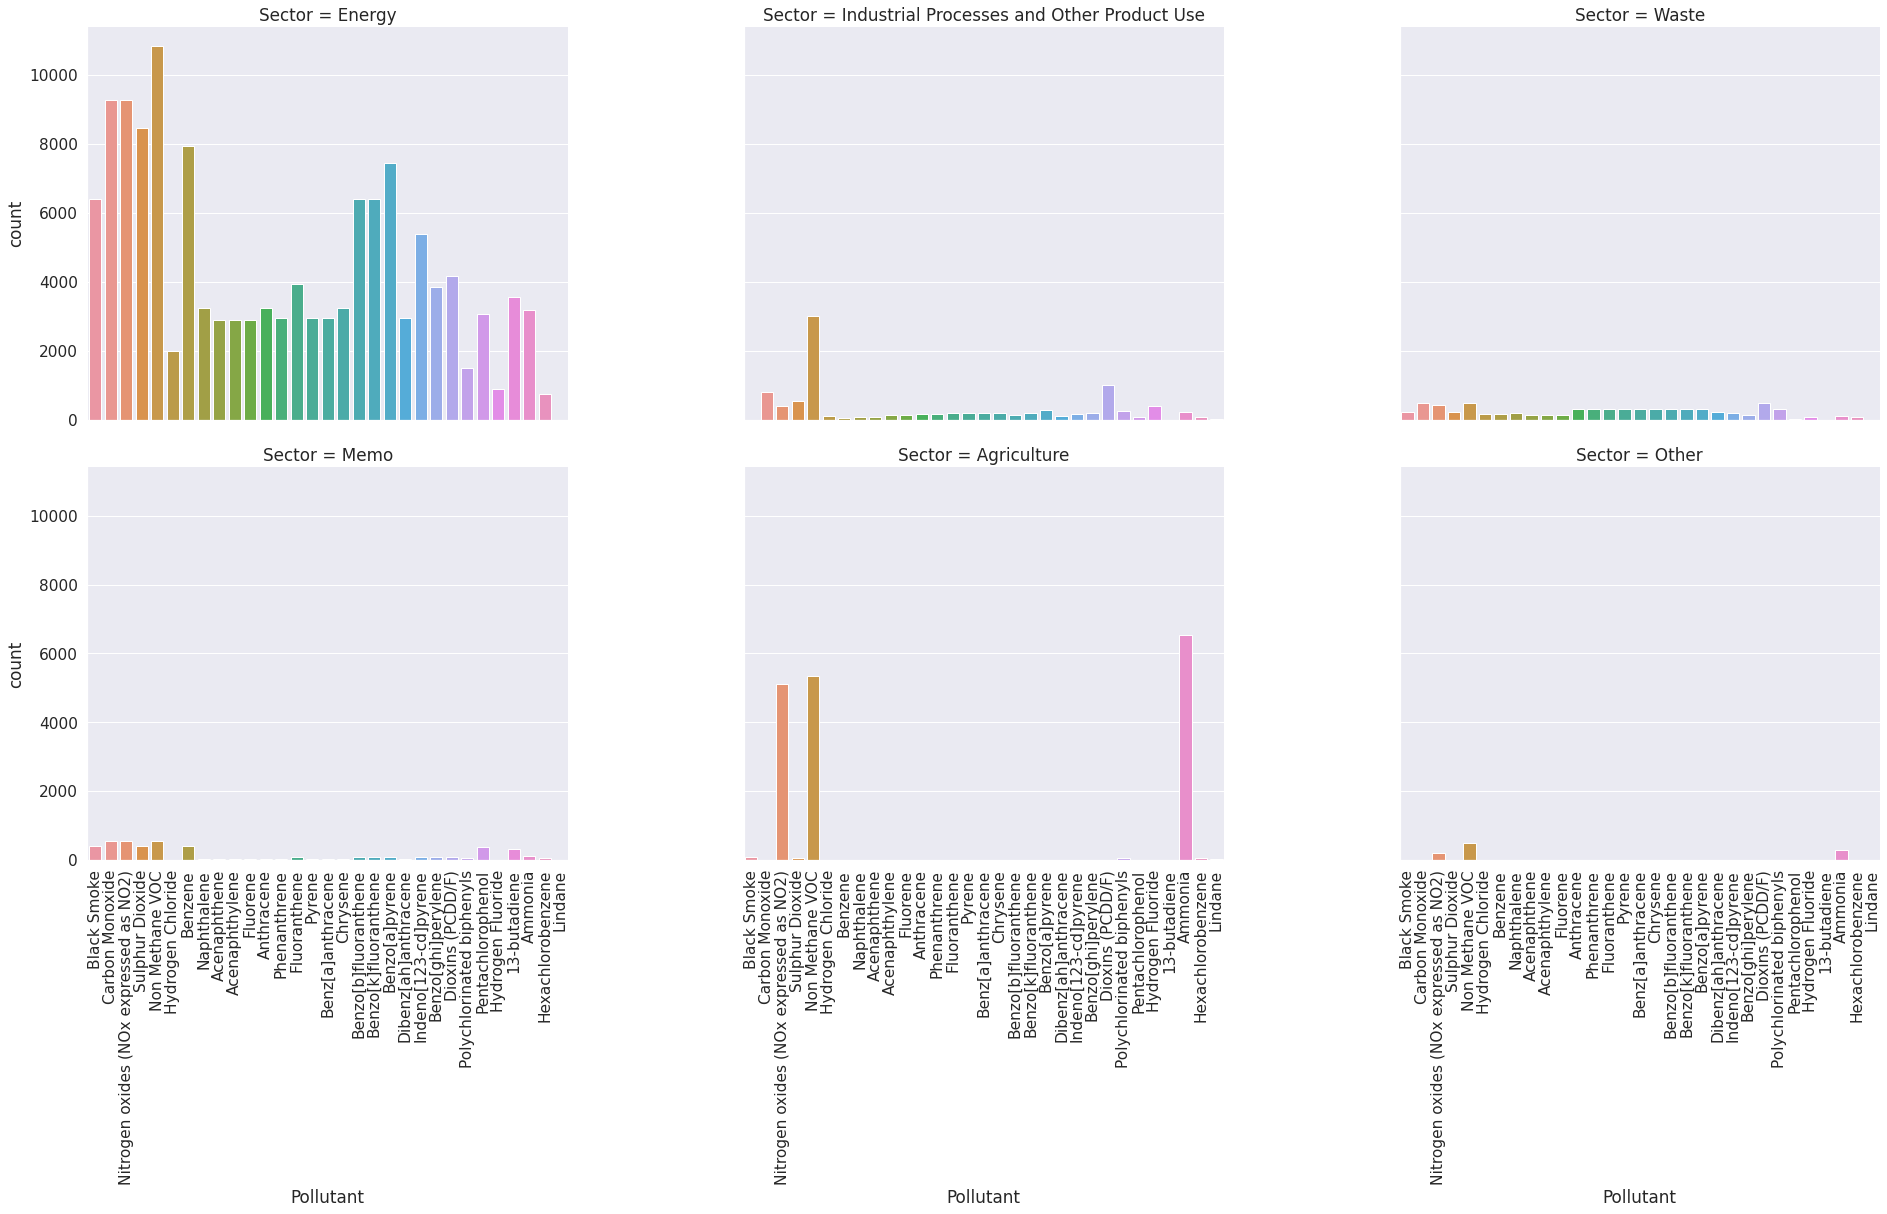

In [84]:
sns.set(font_scale=1.4)
g = sns.catplot(data = df, x='Pollutant', kind='count', col='Sector', col_wrap=3, height=6.5, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)
plt.show()

# NAEI Heavy Metals Download

In [6]:
hm_2010_2020 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=180173&section=ef")
hm_1999_2009 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=180174&section=ef")
hm_1988_1998 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=180175&section=ef")
hm_1977_1987 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=180176&section=ef")
hm_1976_1970 = pd.read_csv("https://naei.beis.gov.uk/data/download?q=180177&section=ef")
hm_list = [hm_2010_2020, hm_1999_2009, hm_1988_1998, hm_1977_1987, hm_1976_1970]

In [4]:
[df.shape for df in hm_list]

[(23030, 9), (23929, 9), (24731, 9), (23232, 9), (14784, 9)]

In [7]:
df_heavy_metals = pd.concat(hm_list)


In [7]:
# df_heavy_metals.to_csv('naei_heavy_metal_pollutant_factors.csv')

In [19]:
pd.set_option('display.max_rows', 1000)

df_heavy_metals.groupby('Pollutant')['Source'].value_counts()

Pollutant  Source                                                            
Arsenic    Domestic combustion                                                   539
           Other industrial combustion                                           341
           Miscellaneous industrial/commercial combustion                        244
           Public sector combustion                                              215
           Road transport - LGVs - motorway driving                              204
                                                                                ... 
Zinc       Aircraft between UK and other OTs (excl Gib. and Bermuda) - Cruise     29
           Aircraft between UK and other OTs (excl Gib. and Bermuda) - TOL        29
           Incineration                                                           27
           Road transport - motorcycle (>50cc  2st) - rural driving               20
           Town gas manufacture                                         